# Data Visualization

In this notebook, we will use the [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/index.html) libraries to visualize the popular [iris](https://archive.ics.uci.edu/ml/datasets/iris) dataset. We will create some basic plots, like scatterplots and histograms, as well as some more complicated visuals like pairplots and a 3D plot.

In [2]:
# Load Necesary packages
# Numpy, which is an underlying library to most mathematical python libraries
import numpy as np
# Pandas, for storing dataframes of data
import pandas as pd
# We will use the datasets method from sklearn to import the iris data
from sklearn import datasets

# Import matplotlib
import matplotlib.pyplot as plt
# Import for 3D plots in matplotlib
from mpl_toolkits import mplot3d
# Import seaborn
import seaborn as sns
# Allow matplotlib plots to be shown in the notebook, rather needing to be popped out
%matplotlib inline

# Matplotlib and Seaborn

Matplotlib is the most popular python plotting library. Its low-level interface offers a lot of customizability and plotting capabilities at the cost of having to write more code. Seaborn is a high level interface, based on matplotlib. It can create plots in much fewer lines of code, and is directly handles pandas dataframes.

The iris dataset is a collection of petals lengths and widths from three different species of iris flower. We want to use visualizations to distinguish between the three speicies of iris. Start by loading the data into a pandas dataframe.

In [3]:
# Load the iris dataset
iris = datasets.load_iris()
# Look at the available information about the dataset.
print(iris["DESCR"])
# Store the data as a dataframe.
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["species"] = iris["target"]

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# And let's take a numerical look at our variables
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [6]:
df["species"].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

From the numerical analysis, we can see that there are no null, missing or strange values. Also, there are equal amounts of each class. That knowledge is great, it means we don't have to look out for missing or miscoded values. 

Now let's visualize actually visualize our data with some histograms and boxplots. Histograms show us the count of each numeric/categorical value, so they can be used to get idea for distributions of each feature, and particularly between each species. Boxplots show us the spread of the the data, and can be used to understand measures of central tendency in the data, like the median and variance. It can also be used to identify outliers.

We will plot histograms using matplotlib's [`hist()`](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.hist.html) method and the boxplots using sea

Text(0.5, 1.0, 'species sepal length')

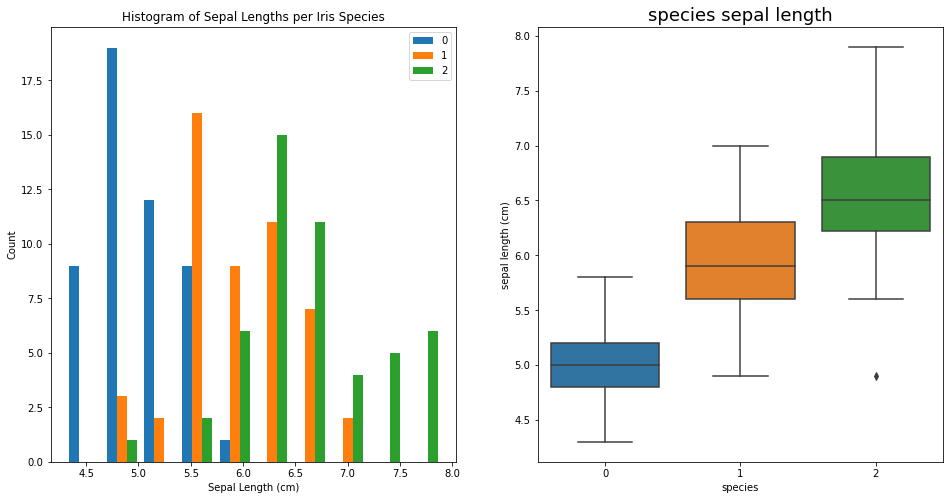

In [7]:
# Histogram and boxplot of sepal length per class

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

x1 = list(df.loc[df["species"]==0]["sepal length (cm)"])
x2 = list(df.loc[df["species"]==1]["sepal length (cm)"])
x3 = list(df.loc[df["species"]==2]["sepal length (cm)"])

ax[0].hist([x1, x2, x3], label=["0","1","2"])
ax[0].set_title("Histogram of Sepal Lengths per Iris Species")
ax[0].set_xlabel("Sepal Length (cm)")
ax[0].set_ylabel("Count")
ax[0].legend()

sns.boxplot(x = "species", y = "sepal length (cm)", data = df, ax=ax[1])
plt.title("species sepal length", size=18)

Text(0.5, 1.0, 'Boxplots of Sepal Width Per Species')

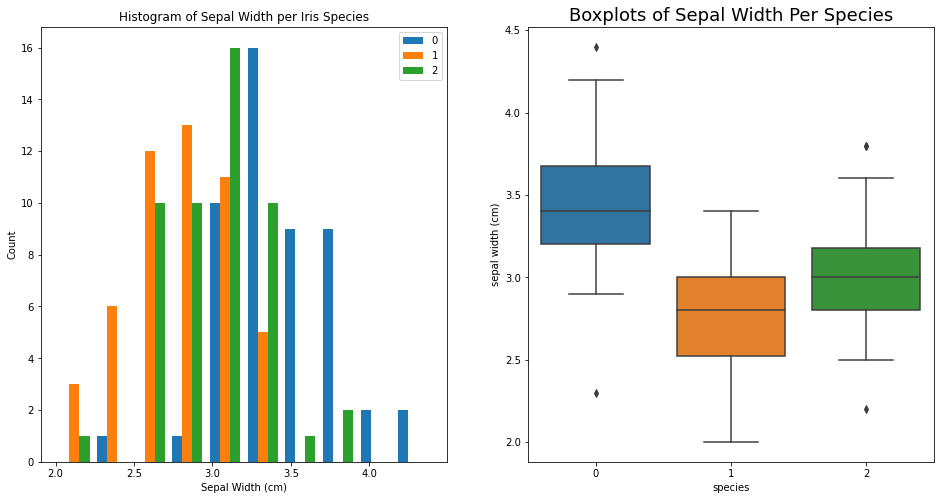

In [8]:
# Histogram and boxplot of Sepal width per class
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

x1 = list(df.loc[df["species"]==0]["sepal width (cm)"])
x2 = list(df.loc[df["species"]==1]["sepal width (cm)"])
x3 = list(df.loc[df["species"]==2]["sepal width (cm)"])

ax[0].hist([x1, x2, x3], label=["0","1","2"])
ax[0].set_title("Histogram of Sepal Width per Iris Species")
ax[0].set_xlabel("Sepal Width (cm)")
ax[0].set_ylabel("Count")
ax[0].legend()

sns.boxplot(x = "species", y = "sepal width (cm)", data = df, ax=ax[1])
plt.title("Boxplots of Sepal Width Per Species", size=18)

Text(0.5, 1.0, 'Boxplots of Petal Length Per Species')

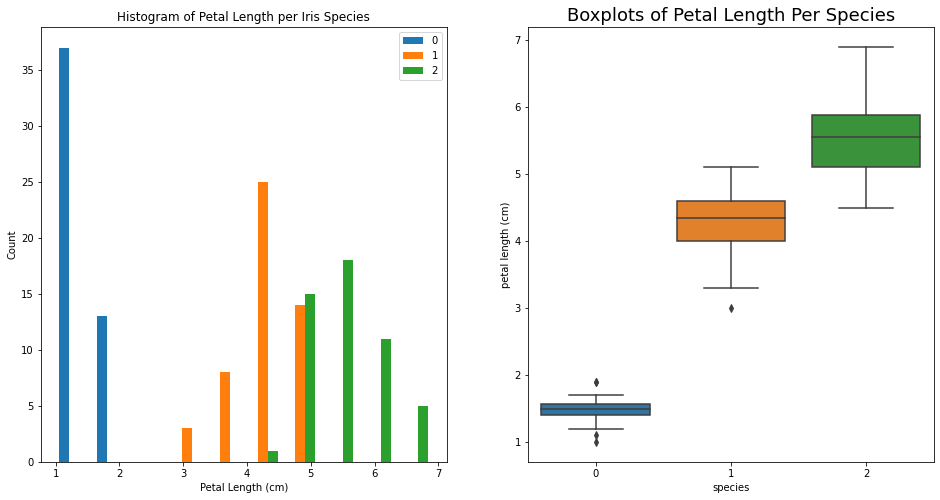

In [9]:
# Histogram and boxplot of petal lengths
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

x1 = list(df.loc[df["species"]==0]["petal length (cm)"])
x2 = list(df.loc[df["species"]==1]["petal length (cm)"])
x3 = list(df.loc[df["species"]==2]["petal length (cm)"])

ax[0].hist([x1, x2, x3], label=["0","1","2"])
ax[0].set_title("Histogram of Petal Length per Iris Species")
ax[0].set_xlabel("Petal Length (cm)")
ax[0].set_ylabel("Count")
ax[0].legend()

sns.boxplot(x = "species", y = "petal length (cm)", data = df, ax=ax[1])
plt.title("Boxplots of Petal Length Per Species", size=18)

Text(0.5, 1.0, 'Boxplots of Petal Width Per Species')

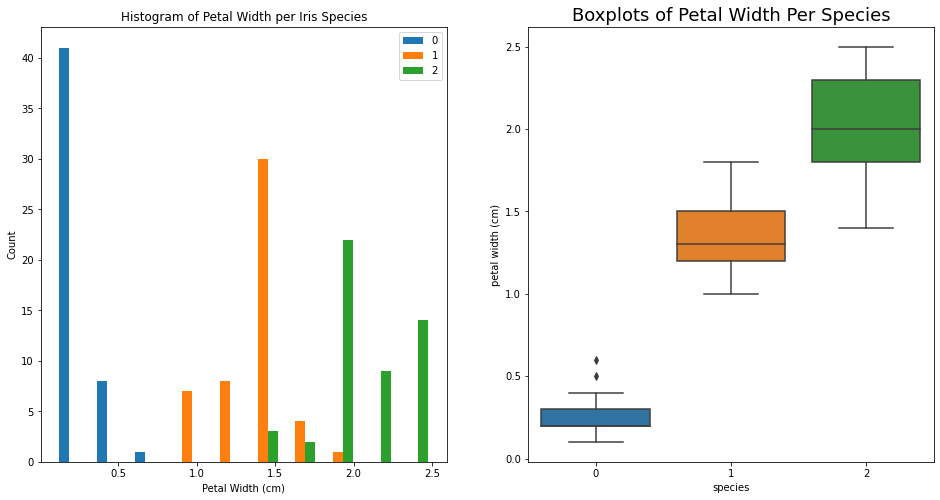

In [10]:
# Histogram and boxplots of petal widths
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

x1 = list(df.loc[df["species"]==0]["petal width (cm)"])
x2 = list(df.loc[df["species"]==1]["petal width (cm)"])
x3 = list(df.loc[df["species"]==2]["petal width (cm)"])

ax[0].hist([x1, x2, x3], label=["0","1","2"])
ax[0].set_title("Histogram of Petal Width per Iris Species")
ax[0].set_xlabel("Petal Width (cm)")
ax[0].set_ylabel("Count")
ax[0].legend()

sns.boxplot(x = "species", y = "petal width (cm)", data = df, ax=ax[1])
plt.title("Boxplots of Petal Width Per Species", size=18)

From these plots, we can see that there is a big difference between the values of species 0 from species 1 and 2. Species 1 and 2 have more similar feature values, so it might be harder to distinguish between those two than from species 0. We can also see that there is greater difference between species when comparing their petals than when comparing their sepals. To classify between the species, it will probably be better to focus on the different leaf values.

Now, let's make some scatterplots of the values to see how they relate to each other. Scatterplots can show us how different features relate to each other. If one value increases, does the other value increase? Does it decrease? They can be great at getting a high level understand of how the features relate to each other. We can plot scatterplots using seaborn's `scatterplot` method.

Text(0.5, 1.0, 'Sepal Width vs. Sepal Length')

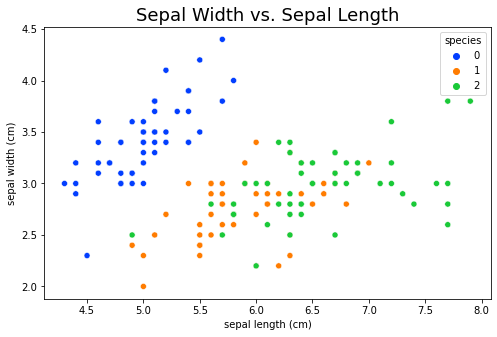

In [11]:
# Scatterplot of Sepal Width vs Sepal Length
sns.scatterplot(x = "sepal length (cm)", y = "sepal width (cm)", hue = "species", palette = "bright", data = df)
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.title("Sepal Width vs. Sepal Length", size=18)

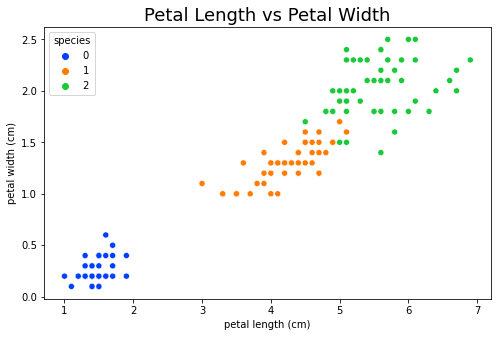

In [12]:
sns.scatterplot(x = "petal length (cm)", y = "petal width (cm)", hue = "species", palette = "bright", data = df)
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.title("Petal Length vs Petal Width", size=18)
plt.show()

We can see the difference between the `1` and `2` labels a bit more clearly in these scatterplots. Let's do some feature engineering to see if calculating the area gives us a better seperation between the species.

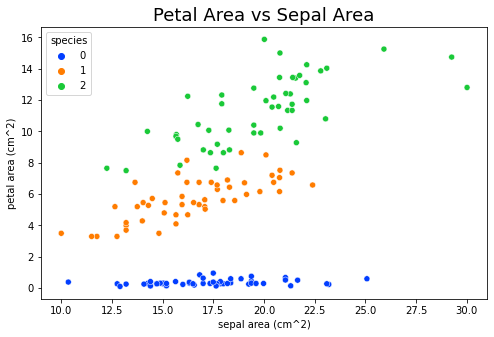

In [13]:
df['sepal area (cm^2)'] = df['sepal length (cm)'] * df['sepal width (cm)']
df['petal area (cm^2)'] = df['petal length (cm)'] * df['petal width (cm)']
df['total area (cm^2)'] = df['petal area (cm^2)'] * df['sepal area (cm^2)']

#  Create a scatterplot of Petal Area and Sepal Area
sns.scatterplot(x = "sepal area (cm^2)", y = "petal area (cm^2)", hue = "species", palette = "bright", data = df)
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.title("Petal Area vs Sepal Area", size=18)
plt.show()

Sadly, the two species are still not linearly seperable.

By now, you've probably noticed one of the downsides of scatterplots. They are (generally) only two dimensional, so if there are many features in the data, then scatterplots alone may not be great at visualizing all of it. In certain cases, it might be useful to increase the number of dimensions of the plot to a 3D space. Let's try that below.

Text(0.5, 0, 'Sepal Length')

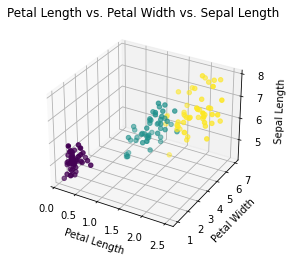

In [14]:
# 3d Scatterplot of Petal Length vs Petal Width vs Sepal Length
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter(xs=df["petal width (cm)"], 
           ys=df["petal length (cm)"], 
           zs=df["sepal length (cm)"],
           c=df["species"])
ax.set_title("Petal Length vs. Petal Width vs. Sepal Length")
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_zlabel("Sepal Length")

However, 3D plots don't solve that problem. One way that we would be able to compare all of the features together is with a pairplot. What that does is plot a scatterplot for each feature x feature pair in the data. One feature will be on the x-axis, and the other on the y-axis. This way we can scan the relations between all the features at the same time. This isn't practical for dataset with a lot of features, but it is useful for a moderate amount of features like the iris datset.

We can easily create a pairplot using seaborn's `pairplot()` method.

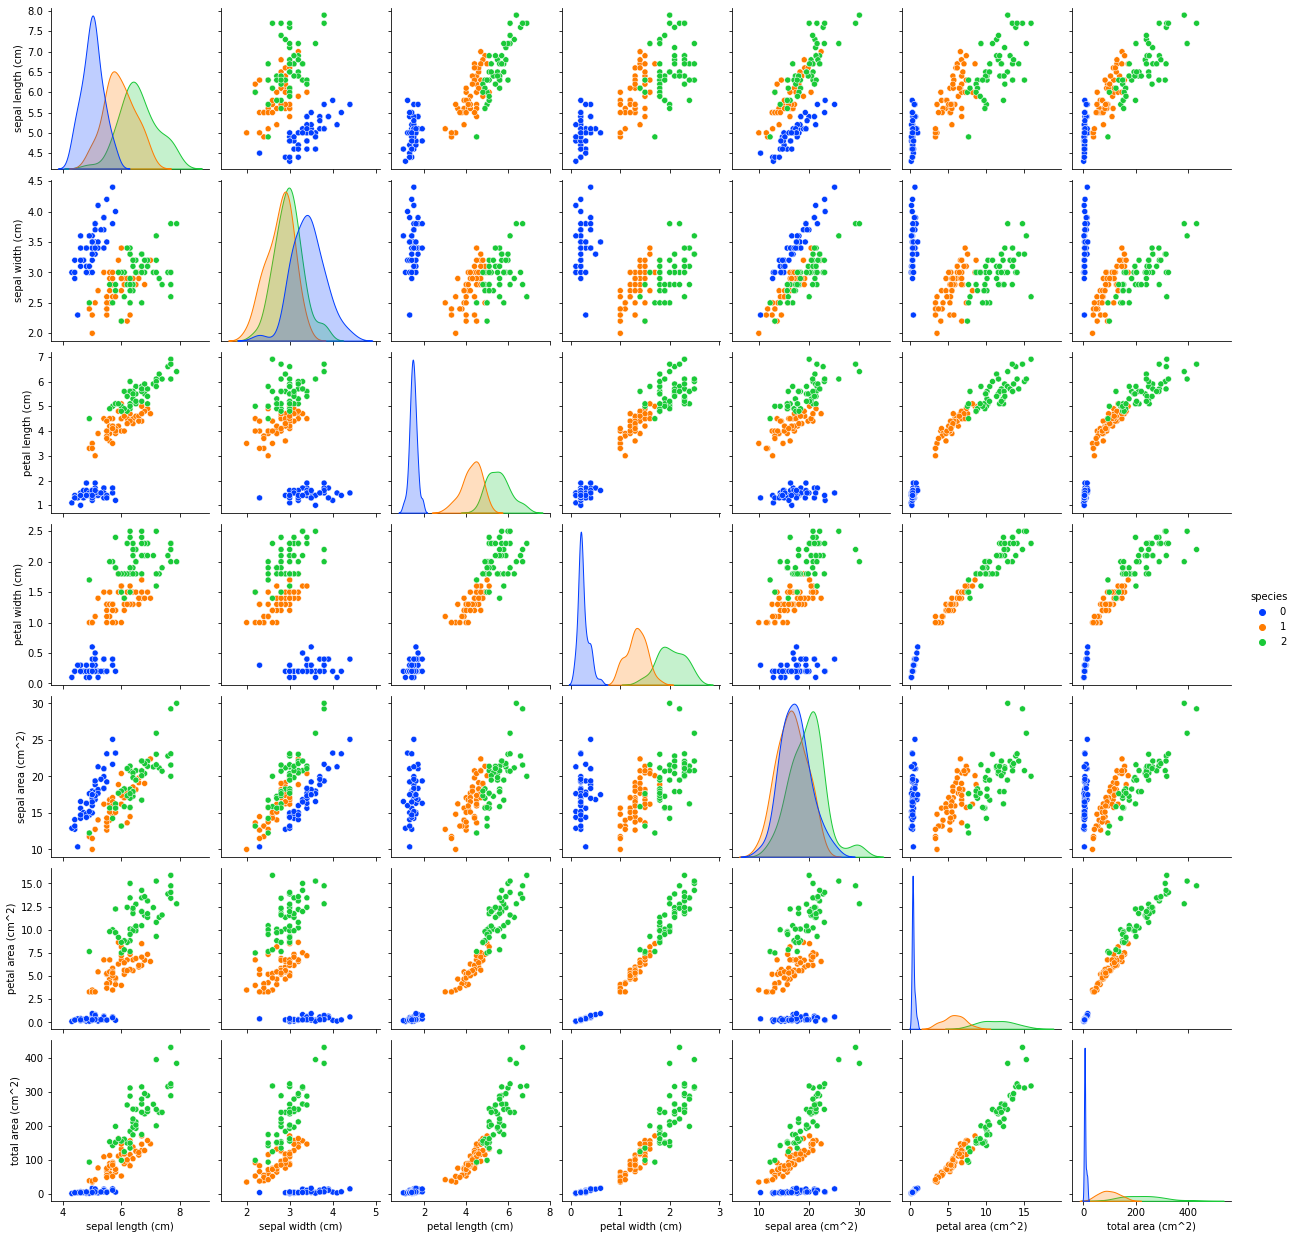

In [15]:
sns.pairplot(data=df, hue="species", palette="bright")

One last way to compare relations between features is with their correlations, which can easily be displayed with a heatmap. The layout is similar to that of a pairplot, with each feature on both the x and y axes.

We can create a heatmap using seaborn's `heatmap()` method.

<AxesSubplot:>

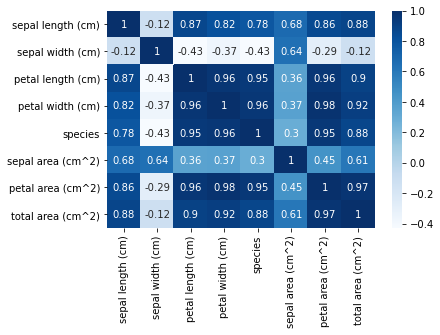

In [21]:
# Calculate the correlations of each feature
corr = df.corr()

# Plot the heatmap of the features
sns.heatmap(corr, annot=True, cmap="Blues")